# **Modules Import & Intiation**

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.metrics import r2_score , accuracy_score , confusion_matrix , precision_score , recall_score , f1_score , classification_report , auc , roc_curve

plt.style.use("fivethirtyeight")

# **OSEM Framework will Help us deal with our task**
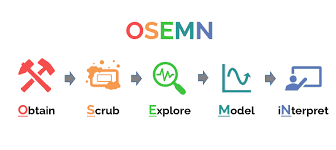

## **Obtain the Data Set**

In [3]:
creditCard = pd.read_csv('creditcard.csv')

In [4]:
creditCard.shape

(284807, 31)

In [5]:
creditCard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
creditCard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
creditCard.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
creditCard.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
202137,134189.0,-0.407729,0.928464,0.677505,-0.715377,0.740001,-0.959543,1.114264,-0.296480,-0.379192,...,-0.174143,-0.452973,-0.070950,-0.059404,-0.496981,0.130556,-0.027686,0.148966,1.98,0
84654,60405.0,0.403856,-1.915464,0.890480,-0.198099,-1.954929,-0.025820,-0.495828,0.196189,2.258569,...,0.209308,0.142047,-0.403684,0.573673,0.385210,-0.671265,0.037309,0.091490,385.56,0
231614,146838.0,2.061171,-0.260734,-1.061636,0.499398,-0.222480,-0.755251,-0.172500,-0.119435,0.981102,...,-0.058831,-0.061411,0.173922,-0.436642,-0.152909,0.294268,-0.052220,-0.064852,1.69,0
169594,119768.0,0.083782,0.984405,-0.333085,-0.636534,0.945598,-0.494765,0.871776,0.047961,-0.332762,...,-0.274167,-0.668336,0.106796,0.603753,-0.478428,0.091953,0.222042,0.075181,4.49,0
211814,138583.0,2.003156,-0.911428,-0.284616,-0.290070,-1.210139,-0.495578,-0.891343,0.033376,-0.030288,...,-0.521777,-1.009285,0.458672,-0.030148,-0.617283,-0.687713,0.044788,-0.032823,31.94,0
181692,125084.0,-1.384562,0.556144,0.182574,-2.596758,0.122978,0.067296,0.575186,0.243399,-1.574335,...,0.005667,-0.275991,-0.577132,-1.143366,0.874931,-0.269989,-0.485337,-0.090507,79.00,0
149235,90858.0,-1.180970,1.654745,-0.473172,-0.478435,-0.286959,-0.976419,0.035153,0.768272,1.137229,...,-0.340343,-0.759239,0.222461,-0.019087,-0.427840,0.093073,0.178810,0.070605,9.12,0
269731,163745.0,-0.015333,0.103066,-0.682412,-0.884493,2.021379,-0.316827,0.499557,-0.028288,-0.293850,...,0.381018,1.010358,-0.185939,-0.295910,-0.102925,-0.232294,0.053109,0.048096,1.00,0
252988,156050.0,-1.448751,2.042931,-1.082058,-1.246040,1.206367,-0.254818,1.259731,-0.324888,1.451941,...,-0.707690,-0.862826,-0.013075,-0.031462,-0.087419,0.048107,0.165287,-0.411996,8.98,0
62850,50457.0,0.877660,-1.305129,1.561016,1.103733,-1.959148,0.538624,-1.244312,0.371954,0.417141,...,-0.248207,-0.267661,-0.027134,0.361144,0.154319,-0.268718,0.098948,0.066760,156.06,0


## **Scrubbing the Data Set from**


1.   Missing Records
2.   Duplicates
3. Outliers



**Missing Values Handler**

In [ ]:
creditCard.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

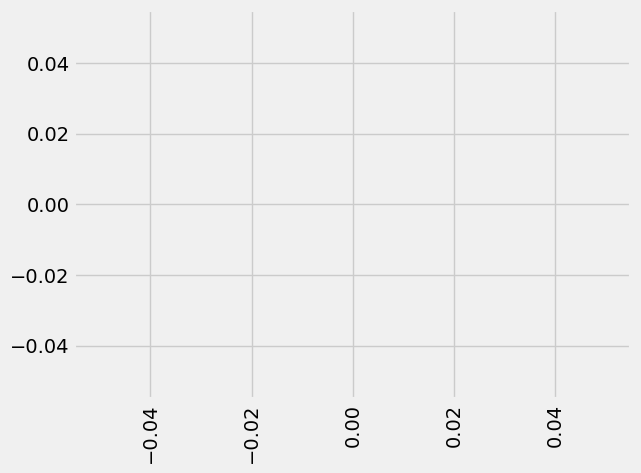

In [47]:
missing = creditCard.isnull().sum()
missing = missing[missing > 0]/creditCard.shape[0] 
plt.bar(missing.index, missing.values)
plt.xticks(rotation = 90)
plt.show()
# We can conclude now that there is not any missing values in any column

**Duplicate Records Handler**

In [10]:
print(f"{creditCard.duplicated().sum() / creditCard.shape[0] * 100 :.2f}  % of the data is duplicated The Decision will be Drop out those duplicated records")
creditCard.drop_duplicates(inplace=True)

0.38  % of the data is duplicated The Decision will be Drop out those duplicated records


In [11]:
creditCard[creditCard.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


##### **Outliers Handler**

*We can now create conclusion that the Z score for the column that will exceed 3 have outliers*

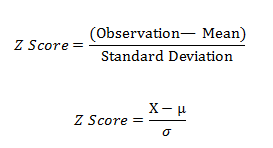

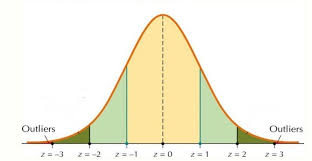

In [ ]:
standered_Z_Score_Fetcher ={}
for column in creditCard.columns:
  standered_Z_Score_Fetcher[column] = (creditCard[column] - creditCard[column].mean()) / creditCard[column].std()

In [ ]:
standered_Z_Score_Fetcher

{'Time': 0        -1.996819
 1        -1.996819
 2        -1.996798
 3        -1.996798
 4        -1.996777
             ...   
 284802    1.642233
 284803    1.642254
 284804    1.642275
 284805    1.642275
 284806    1.642359
 Name: Time, Length: 283726, dtype: float64,
 'V1': 0        -0.701081
 1         0.608791
 2        -0.700335
 3        -0.499064
 4        -0.597605
             ...   
 284802   -6.102092
 284803   -0.379207
 284804    0.982352
 284805   -0.126465
 284806   -0.276860
 Name: V1, Length: 283726, dtype: float64,
 'V2': 0        -0.041687
 1         0.164137
 2        -0.811335
 3        -0.109972
 4         0.535538
             ...   
 284802    6.118845
 284803   -0.030938
 284804   -0.180433
 284805    0.324659
 284806   -0.112709
 Name: V2, Length: 283726, dtype: float64,
 'V3': 0         1.680098
 1         0.109279
 2         1.174268
 3         1.187381
 4         1.025468
             ...   
 284802   -6.519861
 284803    1.347810
 284804   -2.155029
 28

## **Exploring the Data Set Using Visualization Modules**

**As Mentioned in the Task Description there is imbalance in the Target Column**

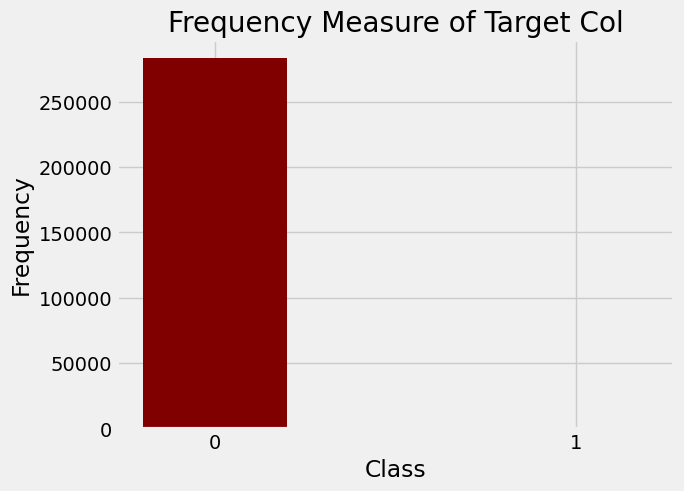

In [31]:
class_counts = creditCard['Class'].value_counts()

plt.bar(class_counts.index, class_counts.values, color='maroon', width=0.4)

plt.xlabel('Class')
plt.xticks([0 , 1])
plt.ylabel('Frequency')
plt.title('Frequency Measure of Target Col')

plt.show()
# print(class_counts.values[1] / class_counts.values[0])

**Plotting the Distribution of All the Data**

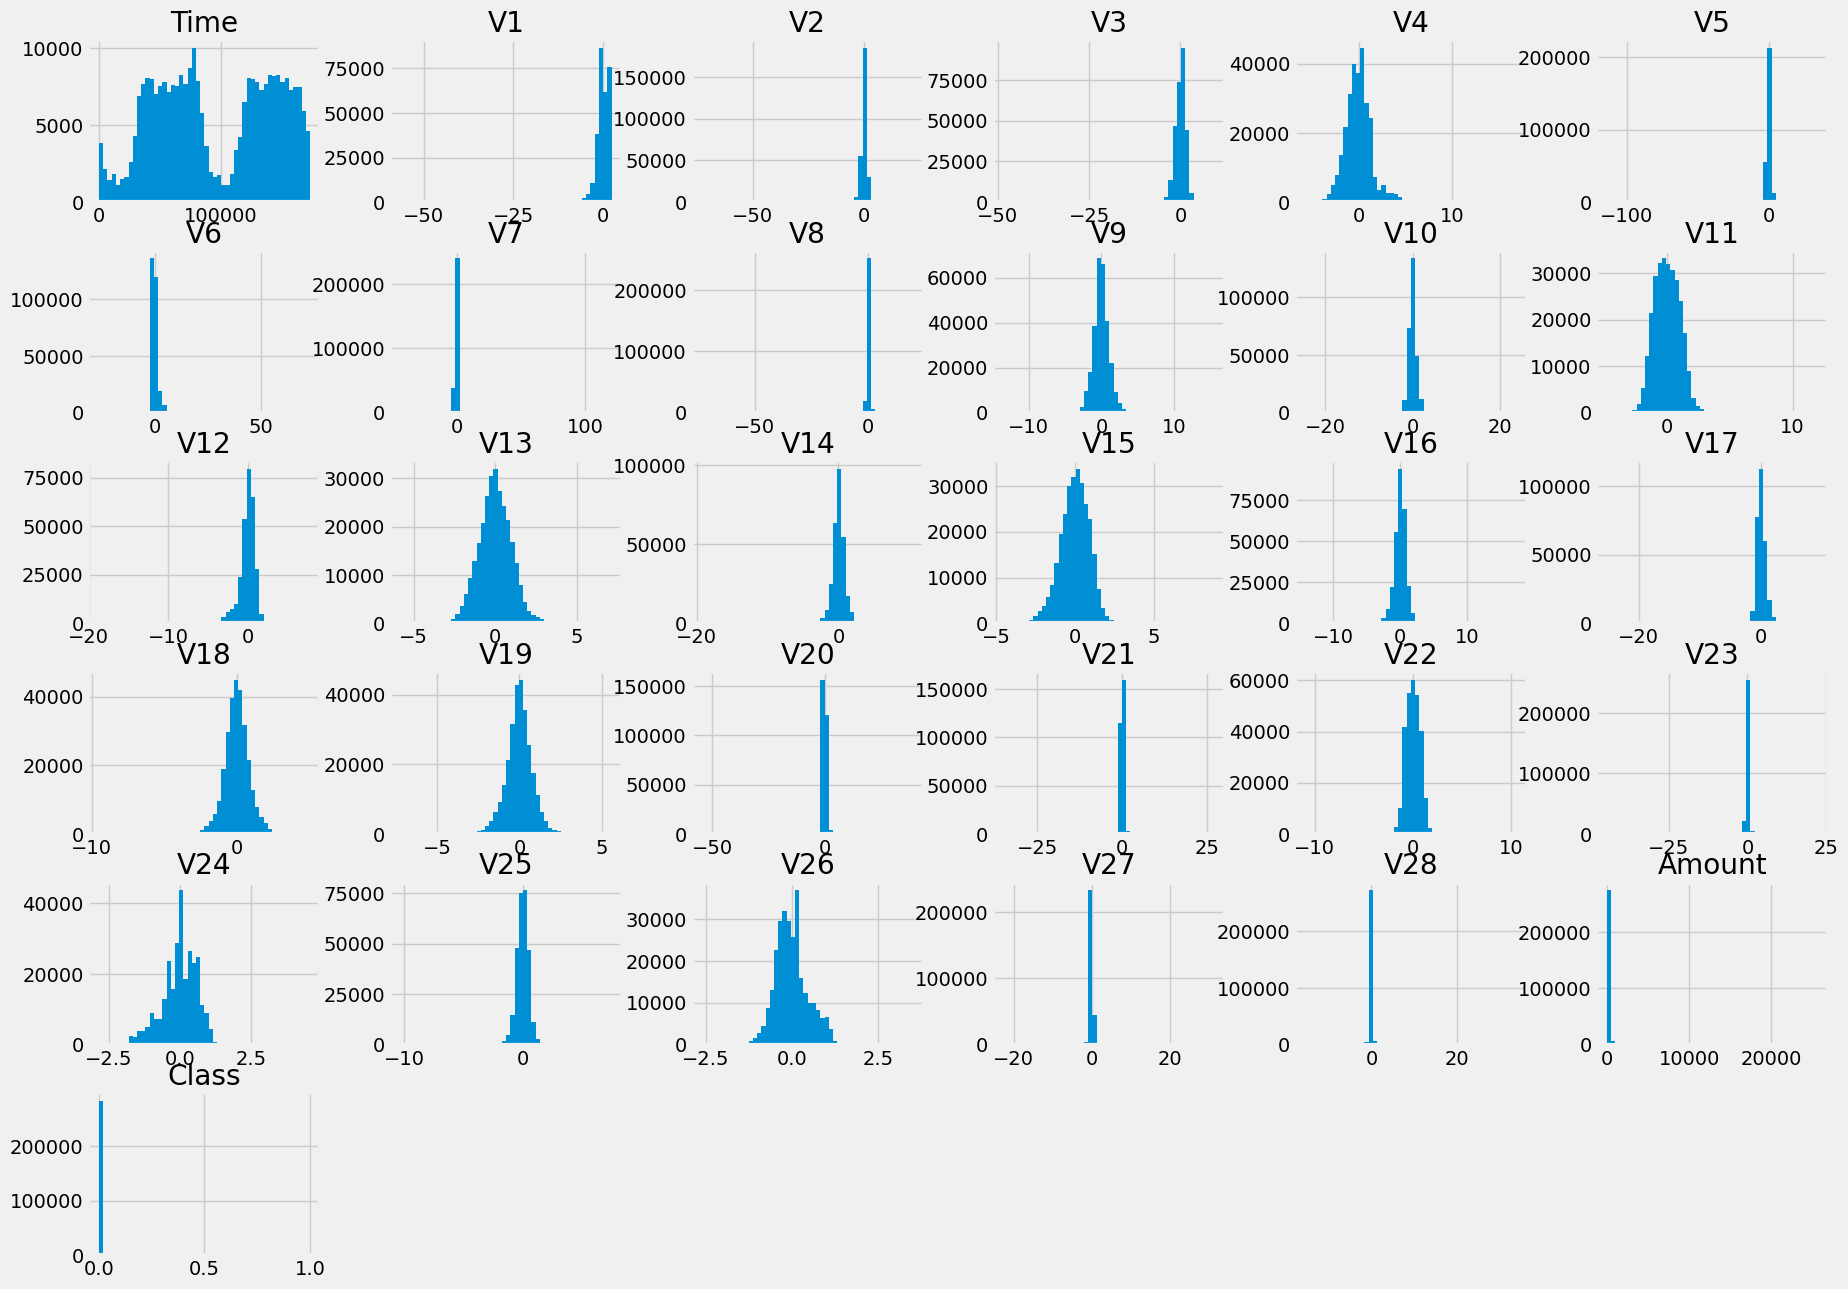

In [50]:
creditCard.hist(bins=50, figsize=(20,15))
plt.show()


**Correlation Matrix**

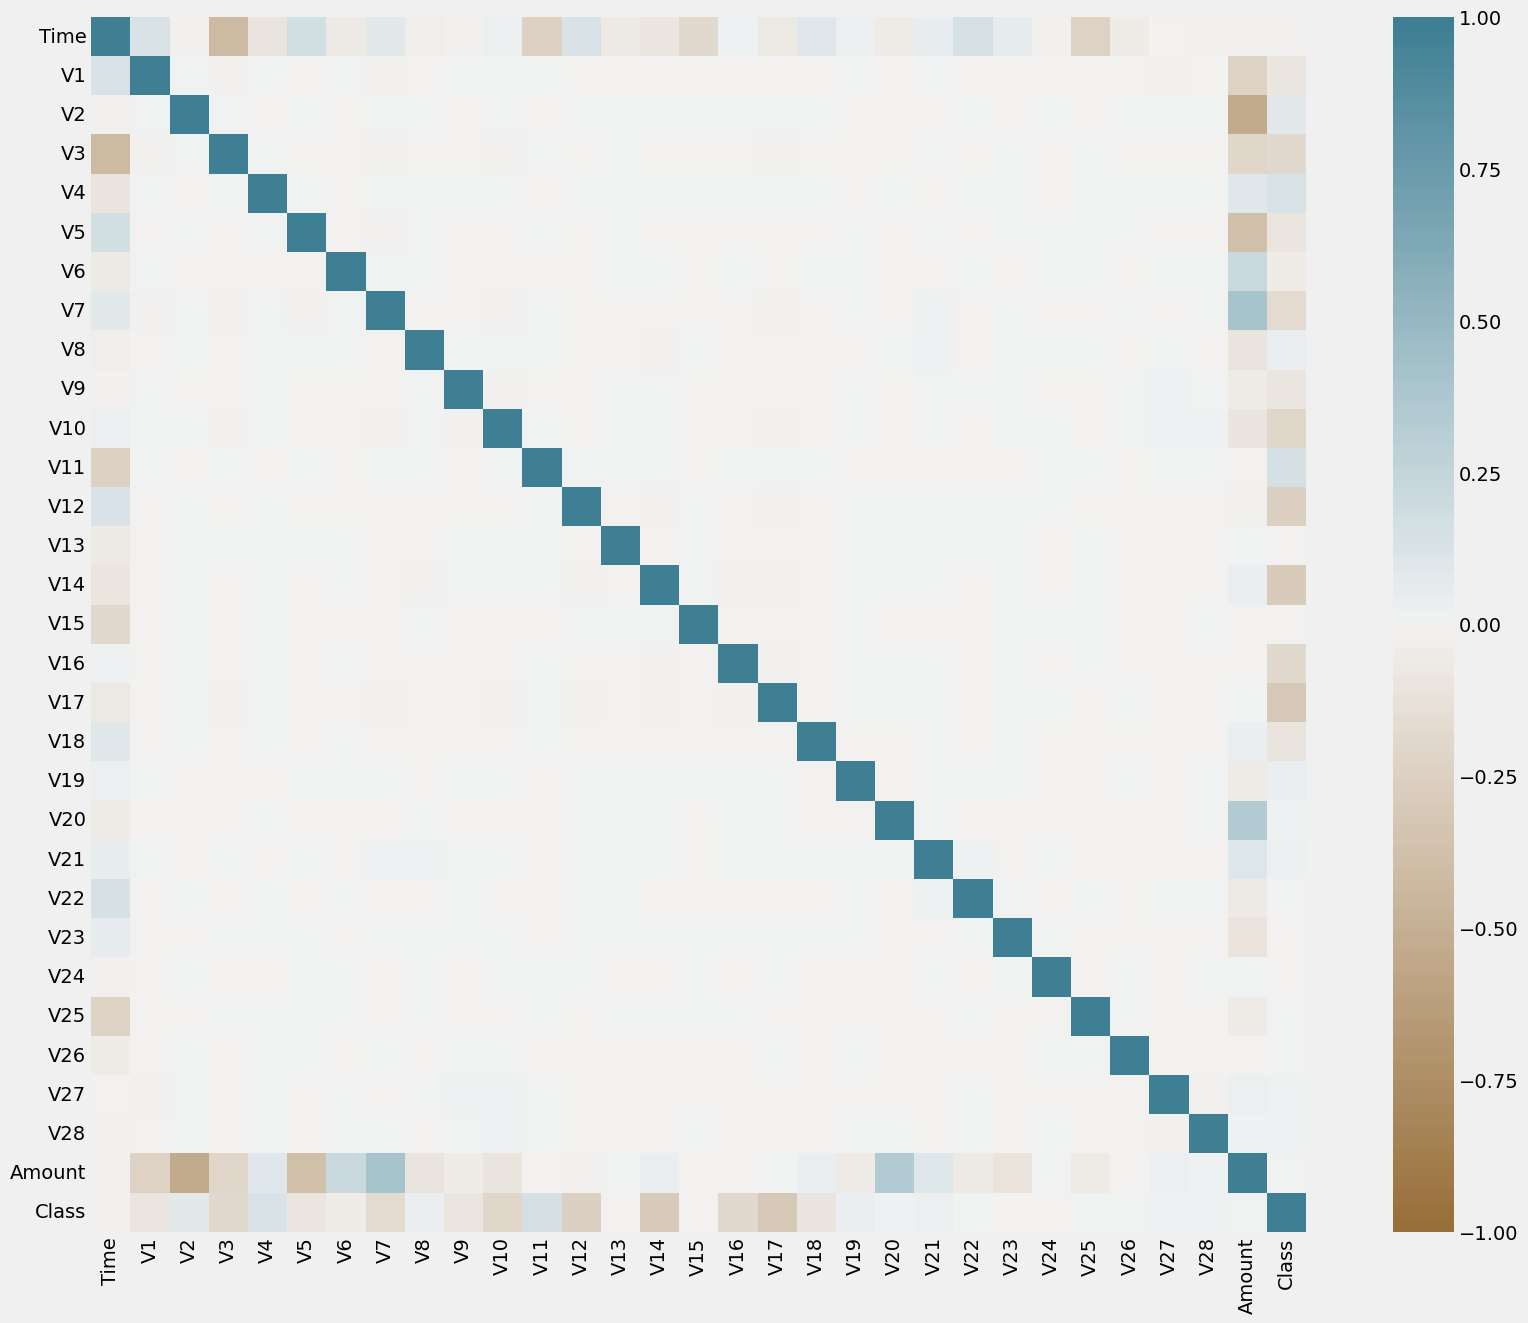

In [54]:
corr_matrix = creditCard.corr()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(
    corr_matrix,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(50, 220, n=200),
    square=True
)

## **Using the data for classfication problem**

**Under Sampling the Imbalanced Feature**

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**KNN Classfier**

In [ ]:
listOfKs = []
listOfAccuracy = []

for k in range(1,50):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  listOfKs.append(k)

**Logistic Regression**

In [ ]:
model = LogisticRegression()
model.fit(X_train, Y_train)
